## Q1:  What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class

We want to find
$$P(\text{Pass} \mid \text{Quick})$$

To do so, let's use the Bayes theorem
$$P(\text{Pass} \mid \text{Quick}) = \frac{P(\text{Quick} \mid \text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})}$$

As per the Law of total probability
$$P(\text{Quick}) = P(\text{Quick} \mid \text{Pass}) \cdot P(\text{Pass}) + P(\text{Quick} \mid \text{Fail}) \cdot P(\text{Fail})$$

We know
$$P(\text{Quick} \mid \text{Pass}) = 0.6$$
$$P(\text{Pass}) = 0.9$$
$$P(\text{Quick} \mid \text{Fail}) = 0.3$$
$$P(\text{Fail}) = 1 - P(\text{Pass}) = 0.1$$

Thus
$$P(\text{Quick}) = (0.6 \cdot 0.9) + (0.3 \cdot 0.1)$$
$$P(\text{Quick}) = 0.54 + 0.03 = 0.57$$

now, we know that for the numerator of the bayes theorem expression, $$P(\text{Quick} \mid \text{Pass}) \cdot P(\text{Pass}) $$ 
simplifies to $$P(\text{Quick} \cap \text{Pass})$$
wherein $$P(\text{Quick} \cap \text{Pass}) = 0.6 \cdot 0.9 = 0.54$$

thus, our answer is = $$ \frac{0.54}{0.57} = 0.947 $$

## Q2

We have a multinomial likelihood function
$$P(\mathbf{X} \mid \boldsymbol{\theta}) = \frac{N!}{X_1! X_2! \cdots X_k!} \prod_{i=1}^k \theta_i^{X_i}$$

and a Dirichlet Prior
$$P(\boldsymbol{\theta}) = \frac{1}{B(\boldsymbol{\alpha})} \prod_{i=1}^k \theta_i^{\alpha_i - 1}$$

Our posterior distribution is the following as per bayes theorem:
$$P(\boldsymbol{\theta} \mid \mathbf{X}) \propto P(\mathbf{X} \mid \boldsymbol{\theta}) \cdot P(\boldsymbol{\theta})$$

Let us substitute the likelihood and the prior
$$P(\boldsymbol{\theta} \mid \mathbf{X}) \propto \left( \prod_{i=1}^k \theta_i^{X_i} \right) \cdot \left( \prod_{i=1}^k \theta_i^{\alpha_i - 1} \right)$$

When we add the exponents we get:
$$P(\boldsymbol{\theta} \mid \mathbf{X}) \propto \prod_{i=1}^k \theta_i^{X_i + \alpha_i - 1}$$

This is nothing but a dirichlet distribution with a modified parameter of $$\alpha_i + X_i$$
This happens because the dirichlet is a conjugate prior of the multinomial distribution. Thus, we get the posterior distribution of the following form:

$$P(\boldsymbol{\theta} \mid \mathbf{X}) = \text{Dirichlet}(\alpha_1 + X_1, \alpha_2 + X_2, \dots, \alpha_k + X_k)$$

Q2 part 2

The posterior is always proportional to the joint, and the posterior is always a proper distribution if the prior is **proper**

A proper prior is a prior that integrates to 1 over its entire domain which important. 

## Q3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.figure_factory as ff


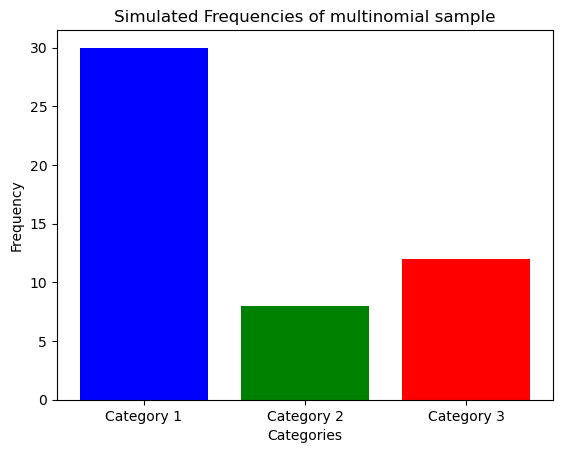

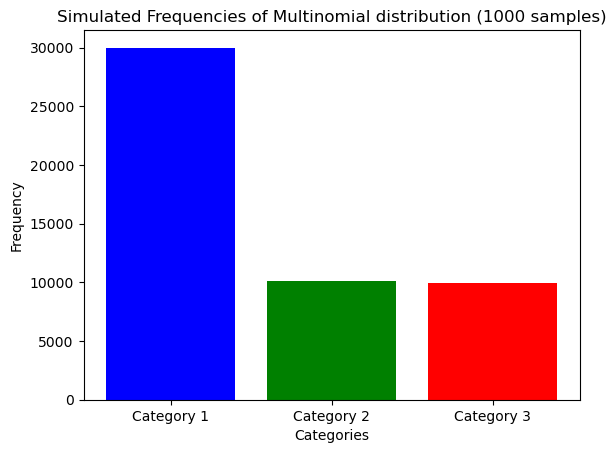

In [16]:


#first lets specify the probabilities for our multinomial model
probs = [0.6,0.2,0.2]

#then, let's specify the number of trials
n_trials = 50
n_samples = 1

np.random.seed(50)
# now, let's generate a sample
sample = np.random.multinomial(n_trials, probs, size=n_samples)

# Calculate frequencies of outcomes for each category
category_totals = sample.sum(axis=0)

# Bar plot illustrating the multinomial sample distribution for one sample
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, category_totals, color=['blue', 'green', 'red'])
plt.title('Simulated Frequencies of multinomial sample')
plt.ylabel('Frequency')
plt.xlabel('Categories')
plt.show()


samples = np.random.multinomial(n_trials, probs, size=1000)
category_totals_1 = samples.sum(axis=0)
# Bar plot illustrating the multinomial distribution for several samples
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, category_totals_1, color=['blue', 'green', 'red'])
plt.title('Simulated Frequencies of Multinomial distribution (1000 samples)')
plt.ylabel('Frequency')
plt.xlabel('Categories')
plt.show()

In [9]:
category_totals

array([30,  8, 12])

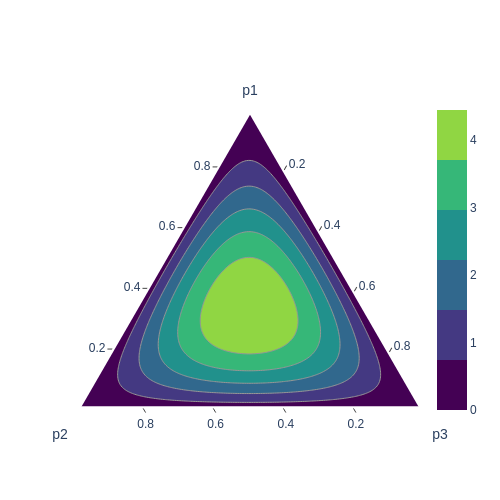

In [18]:
#constructing the simplex dirichlet ternary plot for the prior distribution
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

#we specify sample alpha values
alpha_prior = np.array([2,2,2])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

figure = ff.create_ternary_contour(p.T, dirichlet_prior_densities, pole_labels=['p1', 'p2', 'p3'],
                                   interp_mode='cartesian', showscale = True, colorscale='Viridis')
figure.show('png')

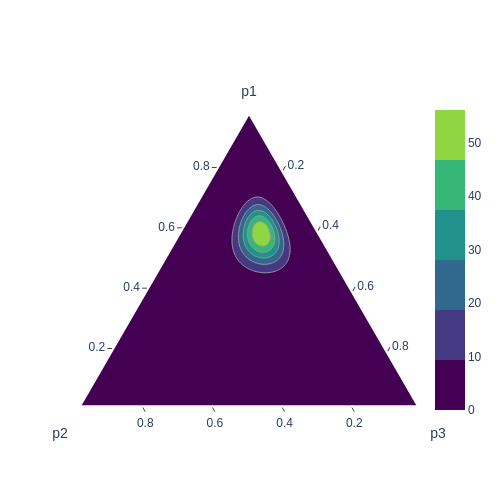

In [19]:
# posterior dirichlet distribution

alpha_posterior = np.add(alpha_prior, category_totals)
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

figure_1 = ff.create_ternary_contour(p.T, dirichlet_posterior_densities, pole_labels=['p1', 'p2', 'p3'],
                                   interp_mode='cartesian', showscale = True, colorscale='Viridis')
figure_1.show('png')